<a href="https://colab.research.google.com/github/PiedinoTimido/EpsteinName/blob/main/Epstein_name.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EPSTEIN NAME GRAPH CODE AHAHHA
just start this and see the magic 🪄

##Code for the Mentions by Category graph


In [ ]:
import pandas as pd #importing something know as pd and plt
import matplotlib.pyplot as plt

#dora the explora ahh moment
file_path = 'https://docs.google.com/spreadsheets/d/1eFYQOLw4lBXqlA-V7l4ZyrLSBpu0zyXdQPQLZES5Z_I/export?format=csv'
df = pd.read_csv(file_path) #where is the csv? its right there! lets read it!
df.columns = df.columns.str.strip()

#grupping by category! and sorting moment
cat_counts = df['Category'].value_counts().sort_values()

#setting up... like when first booting a phone
fig, ax = plt.subplots(figsize=(10, 8), facecolor='#000000')
ax.set_facecolor('#000000')

#color ahhhh moment
colors = plt.cm.viridis(range(0, 256, 256 // len(cat_counts)))

#cooking the pie
patches, texts, autotexts = ax.pie(
    cat_counts,
    labels=cat_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    textprops={'color': "w", 'fontsize': 12}
)

#i don't want to be bald, but you are!
for autotext in autotexts:
    autotext.set_weight('bold')

#title
plt.title('Distribution of Mentions by Category', color='white', fontsize=16, fontweight='bold', pad=20)


plt.tight_layout()
plt.show() #DONE YAYAYAYAYYAY

# Code for the Name Mentions graph

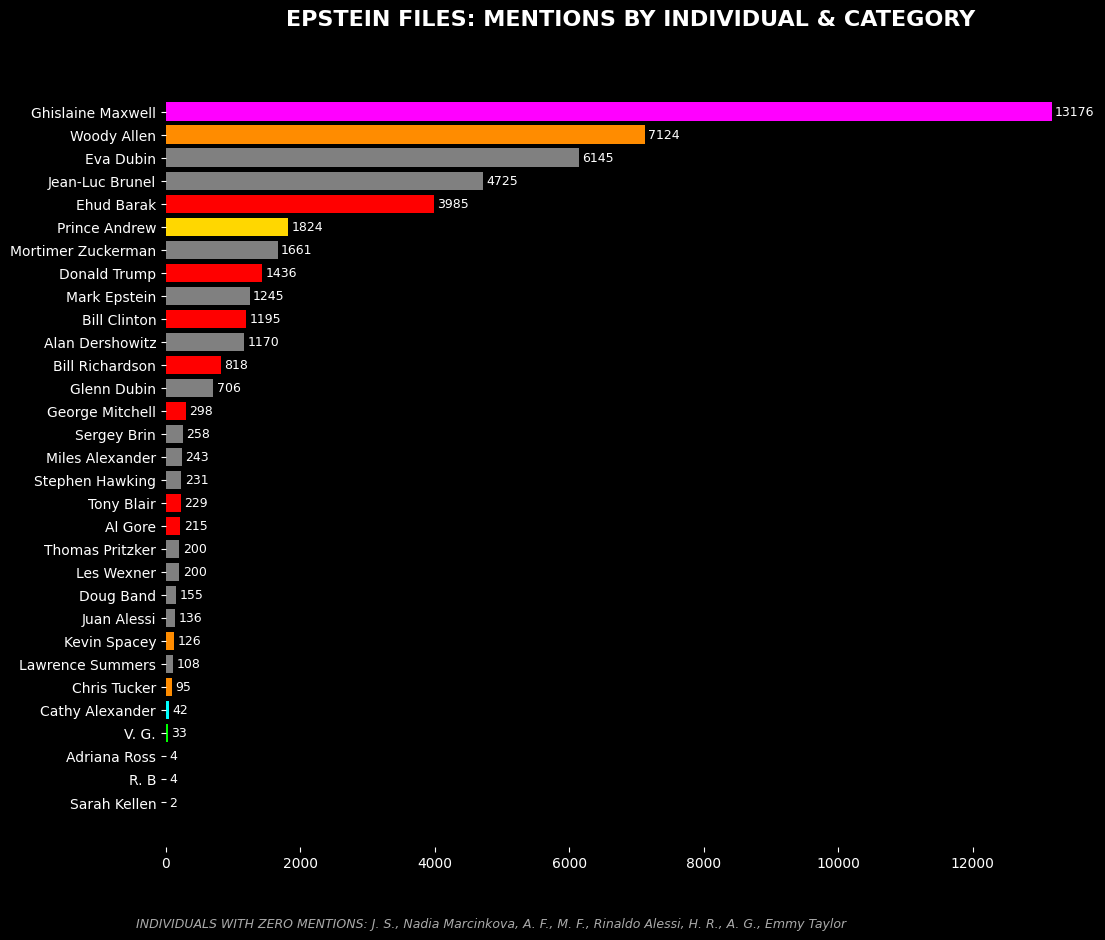

In [7]:
#Importing the thingy that i don't remember the name lol
import pandas as pd
import matplotlib.pyplot as plt

#uploading filessssss ahhh
file_path = 'https://docs.google.com/spreadsheets/d/1eFYQOLw4lBXqlA-V7l4ZyrLSBpu0zyXdQPQLZES5Z_I/export?format=csv'
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

#cleaning with python and not spray
df['N. of documents with his name'] = df['N. of documents with his name'].astype(str).str.replace(',', '', regex=False).fillna('0').astype(int)

#deviding with mentions/without mentions
with_mentions = df[(df['N. of documents with his name'] > 0) & (df['Name'] != 'Jeffrey Epstein')].sort_values('N. of documents with his name', ascending=False)
zero_mentions = df[df['N. of documents with his name'] == 0]['Name'].tolist()

#coloring time and strangly its good lol
category_colors = {
    'Public Figure/Politician': '#ff0000',
    'Public Figure/Royal': '#ffd700',
    'Accomplice': '#ff00ff',
    'Victim/Witness': '#00ff00',
    'Staff/Assistant': '#00ffff',
    'Public Figure/Celebrity': '#ff8c00'
}
#if in the list there isn't a category then its gray
colors_list = [category_colors.get(cat, '#808080') for cat in with_mentions['Category']]

#graphic creation time!
fig, ax = plt.subplots(figsize=(12, 10), facecolor='black')
ax.set_facecolor('black')

#barssss moment
bars = ax.barh(with_mentions['Name'], with_mentions['N. of documents with his name'], color=colors_list)

#style and text
ax.tick_params(axis='both', colors='white', labelsize=10)
ax.invert_yaxis()

#numberssss at the end
for bar in bars:
    width = bar.get_width()
    ax.text(width + 50, bar.get_y() + bar.get_height()/2,
            f'{int(width)}', color='white', va='center', fontsize=9)

#title
plt.title('EPSTEIN FILES: MENTIONS BY INDIVIDUAL & CATEGORY', color='white', fontsize=16, fontweight='bold', pad=30)

#removing borders
for spine in ax.spines.values():
    spine.set_visible(False)

#zero mention time
zero_text = "INDIVIDUALS WITH ZERO MENTIONS: " + ", ".join(zero_mentions)
plt.figtext(0.1, 0.02, zero_text, wrap=True, horizontalalignment='left', fontsize=9, color='#aaaaaa', fontstyle='italic') # Changed fontweight to fontstyle

plt.subplots_adjust(bottom=0.1) #space for the text
plt.show() #DONEEEEE YAY